<a href="https://www.kaggle.com/code/mikedelong/world-population-2023-maps?scriptVersionId=139224130" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from math import log10
import pandas as pd
df = pd.read_csv('/kaggle/input/world-population-by-country-2023/WorldPopulation2023.csv')
# give the columns readable names 
df.columns=['Rank', 'Country', 'Population 2023', 'Yearly Change (%)', 'Net Change',
       'Density', 'Land Area', 'Net Migrants', 'Fertility Rate',
       'Median Age', 'Urban Population (%)', 'World Share (%)']
# we will need this later; we do an affine transformation here to avoid a range error
df['log10 Density'] = df['Density'].apply(lambda x: log10(1.0 + x))
# let's convert our percentages to floats
df['Yearly Change Pct'] = df['Yearly Change (%)'].apply(lambda x: float(str(x).replace('%', '')))
df['Urban Population Pct'] = df['Urban Population (%)'].replace('N.A.', '0%').apply(lambda x: float(str(x).replace('%', '')))
df['World Share Pct'] = df['World Share (%)'].apply(lambda x: float(str(x).replace('%', '')))

# rearrange the columns a little
df = df[['Rank', 'Country', 'Population 2023', 'Yearly Change (%)', 'Yearly Change Pct', 'Net Change','Density', 'log10 Density',
         'Land Area', 'Net Migrants', 'Fertility Rate', 'Median Age', 'Urban Population (%)', 'Urban Population Pct', 
         'World Share (%)', 'World Share Pct']]
df.head()

,Rank,Country,Population 2023,Yearly Change (%),Yearly Change Pct,Net Change,Density,log10 Density,Land Area,Net Migrants,Fertility Rate,Median Age,Urban Population (%),Urban Population Pct,World Share (%),World Share Pct
0,36,Afghanistan,42239854,2.70 %,2.70,1111083,65,1.819544,652860,-65846,4.4,17.0,26 %,26.0,0.53 %,0.53
1,138,Albania,2832439,-0.35 %,-0.35,-9882,103,2.017033,27400,-8000,1.4,38.0,67 %,67.0,0.04 %,0.04
2,34,Algeria,45606480,1.57 %,1.57,703255,19,1.301030,2381740,-9999,2.8,28.0,75 %,75.0,0.57 %,0.57
3,212,American Samoa,43914,-0.81 %,-0.81,-359,220,2.344392,200,-790,2.2,29.0,N.A.,0.0,0.00 %,0.00
4,202,Andorra,80088,0.33 %,0.33,264,170,2.232996,470,200,1.1,43.0,85 %,85.0,0.00 %,0.00


In [2]:
df.columns

Index(['Rank', 'Country', 'Population 2023', 'Yearly Change (%)',
       'Yearly Change Pct', 'Net Change', 'Density', 'log10 Density',
       'Land Area', 'Net Migrants', 'Fertility Rate', 'Median Age',
       'Urban Population (%)', 'Urban Population Pct', 'World Share (%)',
       'World Share Pct'],
      dtype='object')

In [3]:
df.tail()

,Rank,Country,Population 2023,Yearly Change (%),Yearly Change Pct,Net Change,Density,log10 Density,Land Area,Net Migrants,Fertility Rate,Median Age,Urban Population (%),Urban Population Pct,World Share (%),World Share Pct
229,225,Wallis & Futuna,11502,-0.60 %,-0.60,-70,82,1.919078,140,-119,1.9,37.0,0 %,0.0,0.00 %,0.00
230,172,Western Sahara,587259,1.96 %,1.96,11273,2,0.477121,266000,5600,2.2,32.0,95 %,95.0,0.01 %,0.01
231,44,Yemen,34449825,2.24 %,2.24,753211,65,1.819544,527970,-29914,3.6,19.0,37 %,37.0,0.43 %,0.43
232,63,Zambia,20569737,2.76 %,2.76,552062,28,1.462398,743390,-5000,4.2,17.0,46 %,46.0,0.26 %,0.26
233,74,Zimbabwe,16665409,2.11 %,2.11,344872,43,1.643453,386850,-9999,3.4,18.0,37 %,37.0,0.21 %,0.21


In [4]:
df.shape

(234, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  234 non-null    int64  
 1   Country               234 non-null    object 
 2   Population 2023       234 non-null    int64  
 3   Yearly Change (%)     234 non-null    object 
 4   Yearly Change Pct     234 non-null    float64
 5   Net Change            234 non-null    int64  
 6   Density               234 non-null    int64  
 7   log10 Density         234 non-null    float64
 8   Land Area             234 non-null    int64  
 9   Net Migrants          234 non-null    int64  
 10  Fertility Rate        233 non-null    float64
 11  Median Age            233 non-null    float64
 12  Urban Population (%)  234 non-null    object 
 13  Urban Population Pct  234 non-null    float64
 14  World Share (%)       234 non-null    object 
 15  World Share Pct       2

In [6]:
df.describe()

,Rank,Population 2023,Yearly Change Pct,Net Change,Density,log10 Density,Land Area,Net Migrants,Fertility Rate,Median Age,Urban Population Pct,World Share Pct
count,234.000000,2.340000e+02,234.000000,2.340000e+02,234.000000,234.000000,2.340000e+02,2.340000e+02,233.000000,233.000000,234.000000,234.000000
mean,117.500000,3.437565e+07,0.965470,3.000230e+05,477.414530,1.983304,5.559568e+05,1.301282e+01,2.414163,31.309013,54.970085,0.427393
std,67.694165,1.373861e+08,1.242413,1.001815e+06,2320.693692,0.674327,1.691024e+06,1.698334e+05,1.155913,9.628386,27.869930,1.707829
min,1.000000,5.180000e+02,-7.450000,-2.957105e+06,0.000000,0.000000,0.000000e+00,-9.104750e+05,0.800000,15.000000,0.000000,0.000000
25%,59.250000,4.696482e+05,0.222500,2.360000e+02,38.250000,1.593813,2.650000e+03,-9.776750e+03,1.600000,22.000000,37.000000,0.010000
50%,117.500000,5.643895e+06,0.805000,2.860150e+04,96.500000,1.988999,7.972000e+04,-5.000000e+02,2.000000,32.000000,59.000000,0.070000
75%,175.750000,2.324537e+07,1.685000,2.236855e+05,242.000000,2.385606,4.070800e+05,4.750000e+02,3.000000,40.000000,78.000000,0.290000
max,234.000000,1.428628e+09,4.980000,1.145449e+07,24360.000000,4.386695,1.637687e+07,1.784718e+06,6.700000,54.000000,99.000000,17.760000


Let's make some maps; first we need to get data that will let plotly place things on a map.

In [7]:
iso_df = pd.read_csv(filepath_or_buffer='/kaggle/input/country-mapping-iso-continent-region/continents2.csv').drop(columns=['alpha-2', 'intermediate-region', 'intermediate-region-code'])
iso_df.head()

,name,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [8]:
from plotly.express import choropleth
def make_map(column: str):
    choropleth(data_frame=df[['Country', column]].merge(right=iso_df[['name', 'alpha-3',]], left_on='Country', right_on='name').drop(columns=['name']), color=column, locations='alpha-3', ).show()
print('defined function make_map')

defined function make_map


In [9]:
columns = [key for key, value in df.dtypes.to_dict().items() if value in ['float64', 'int64']] 
columns

['Rank',
 'Population 2023',
 'Yearly Change Pct',
 'Net Change',
 'Density',
 'log10 Density',
 'Land Area',
 'Net Migrants',
 'Fertility Rate',
 'Median Age',
 'Urban Population Pct',
 'World Share Pct']

In [10]:
make_map(column=columns[0])

In [11]:
make_map(column=columns[1])

In [12]:
make_map(column=columns[2])

In [13]:
make_map(column=columns[3])

In [14]:
make_map(column=columns[4])

What's up with the density? It looks like it is dominated by outliers.

<Axes: >

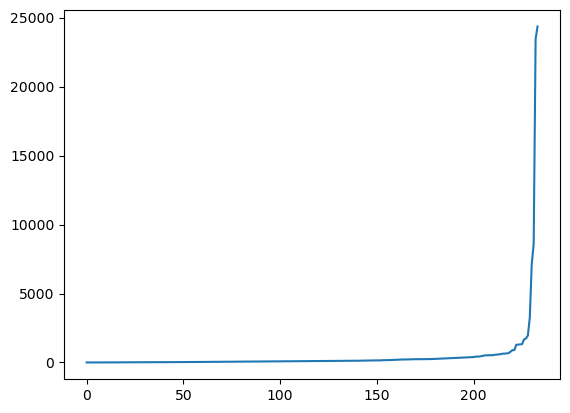

In [15]:
df.sort_values(by='Density').reset_index()['Density'].plot()

In [16]:
make_map(column=columns[5])

In [17]:
make_map(column=columns[6])

In [18]:
make_map(column=columns[7])

In [19]:
make_map(column=columns[8])

In [20]:
make_map(column=columns[9])

In [21]:
make_map(column=columns[10])

In [22]:
make_map(column=columns[11])